In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [3]:
ls

Elbow_method.png  fig2.png  ml_project.ipynb    Snake_plot_1.png
fig1.png          fig3.png  Online_Retail.xlsx  Snake_plot_2.png


In [4]:
Rtl_data = pd.read_excel('Online_Retail.xlsx', encoding = 'unicode_escape')

In [5]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Check the shape of the dataset
print(Rtl_data.shape)

(541909, 8)


In [7]:
#Country wise distribution
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
#Keep only United Kingdom data since it has maximum customers
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [8]:
#Filtering the data where country equal to united kingdom
Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [9]:
Rtl_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [10]:
#We cannt ignore null customerID
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

In [11]:
print(Rtl_data.Quantity.min())
print(Rtl_data.UnitPrice.min())

-80995
0.0


In [12]:
#Quantity cannt be negative
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [13]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [14]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [15]:
#Check the shape of the dataset after cleaning
print(Rtl_data.shape)

(354345, 9)


In [16]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
import datetime as dt

#Setting Latest date 2011-12-10 as last invoice date was 2011-12-09. This is done to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Converting Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Renaming the column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


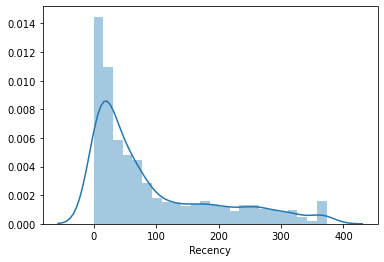

In [18]:
#Plotting recency
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)
plt.show()

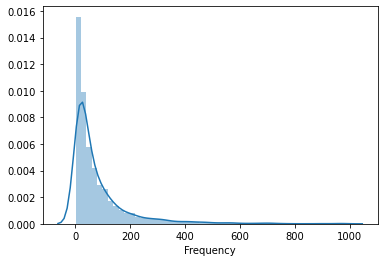

In [23]:
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)
plt.show()

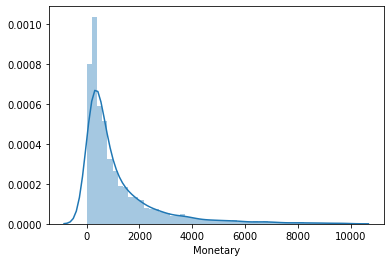

In [22]:
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)
plt.show()

In [24]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

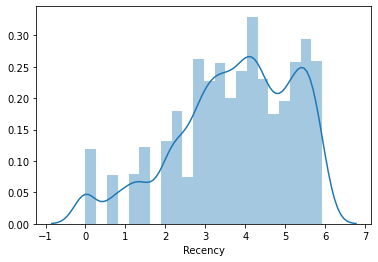

In [25]:
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)
plt.show()

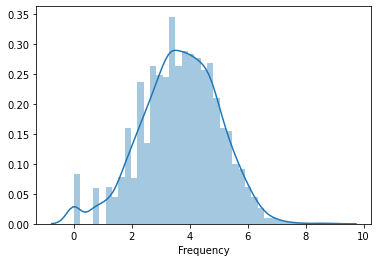

In [26]:
#Data distribution after data normalization of frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)
plt.show()

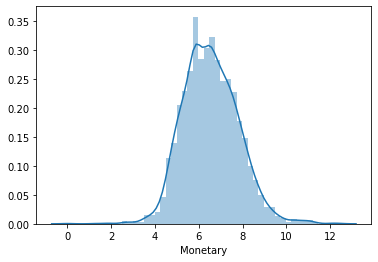

In [27]:
#Data distribution after data normalization of monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [29]:
data=np.array(Scaled_Data)

In [30]:
reps=100
max_iter=300

In [31]:
sse=[]
kk=[]
for k in tqdm(range(1,11)):
    mini_error = math.inf
    for xx in range(reps):
        #randomly choosing k centroids
        centroids = data[random.sample(range(0,len(data)),k)]
        for yy in range(max_iter):
            #key are going to be centroid's index and value is going to be points belonging to that cluster
            classifications = {}
            #initialisating with empty array
            for i in range(k):
                classifications[i] = []

            for x in data:
                #array of the distances between point and centroid
                distances = [np.linalg.norm(x-centroids[centroid]) for centroid in range(len(centroids))]
                #classify to the cluster with whose centroid x has minimum distance        
                classifications[np.argmin(distances)].append(x)

            #recomputing centroid
            prev_centroids = centroids
            for classification in classifications:
                if len(classifications[classification])>0:
                    centroids[classification] = np.average(classifications[classification],axis=0)
                else:
                    centroids[classification] = data[np.random.randint(0,len(data),1)]
            if(max(np.linalg.norm(prev_centroids-centroids,axis=0))<1e-4):
                break
            
        #calculating sum of squared error
        error=0
        for i in range(k):
            for x in classifications[i]:
                error = error + np.square(x-centroids[i]).sum()

        if error<mini_error:
            mini_error = error
    
    kk.append(k)
    sse.append(mini_error)

100%|██████████| 10/10 [03:21<00:00, 20.12s/it]


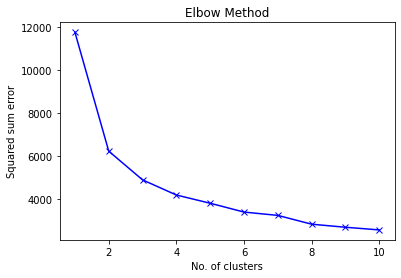

In [34]:
plt.plot(kk,sse,'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Squared sum error')
plt.title("Elbow Method")
plt.savefig('Elbow_method')
plt.show()

In [35]:
k=3

In [36]:
mini_error = math.inf
for xx in tqdm(range(reps)):
    #randomly choosing k centroids
    centroids = data[np.random.randint(0,len(data),k)]
    for yy in range(max_iter):
        #key are going to be centroid's index and value is going to be points belonging to that cluster
        classifications = {}
        #initialisating with empty array
        for i in range(k):
            classifications[i] = []

        for x in data:
            #array of the distances between point and centroid
            distances = [np.linalg.norm(x-centroids[centroid]) for centroid in range(len(centroids))]
            #classify to the cluster with whose centroid x has minimum distance        
            classifications[np.argmin(distances)].append(x)

        #recomputing centroid
        prev_centroids=centroids
        for classification in classifications:
            if len(classifications[classification])>0:
                centroids[classification] = np.average(classifications[classification],axis=0)
            else:
                centroids[classification] = data[np.random.randint(0,len(data),1)]
        if(max(np.linalg.norm(prev_centroids-centroids,axis=0))<1e-4):
            break
    #calculating sum of squared error
    error=0
    for i in range(k):
        for x in classifications[i]:
            error = error + np.square(x-centroids[i]).sum()

    if error<mini_error:
        mini_error = error
        best_centroids = centroids

100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


In [37]:
tmp = []
for x in data:
    distances = [np.linalg.norm(x-best_centroids[centroid]) for centroid in range(len(best_centroids))]
    #classify to the cluster with whose centroid x has minimum distance        
    tmp.append(np.argmin(distances))

In [38]:
RFMScores['Cluster']=tmp

In [39]:
RFMScores.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,1
12747.0,2,103,4196.01,2
12748.0,1,4596,33719.73,2
12749.0,3,199,4090.88,2
12820.0,3,59,942.34,2


<Figure size 504x504 with 0 Axes>

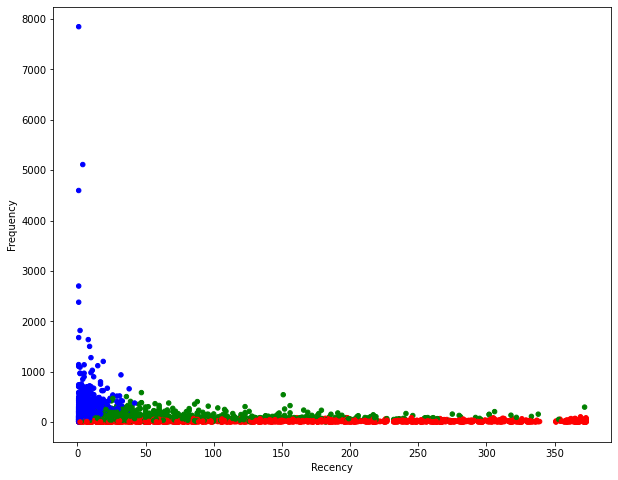

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax1 = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)
plt.savefig('fig1')
plt.show()

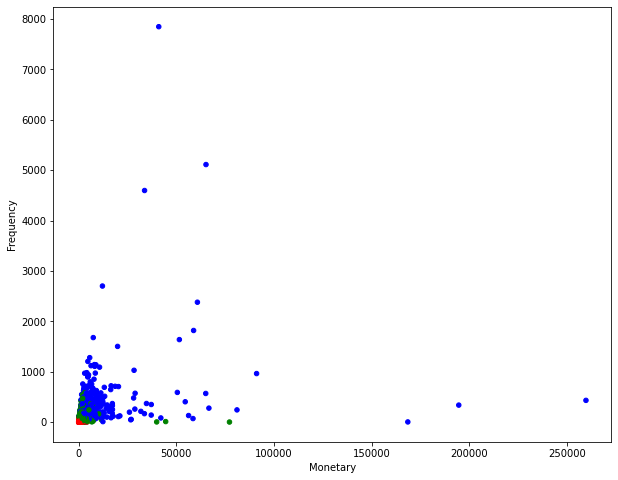

In [41]:
ax2 = RFMScores.plot(    
    kind="scatter", 
    x="Monetary", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)
plt.savefig('fig2')
plt.show()

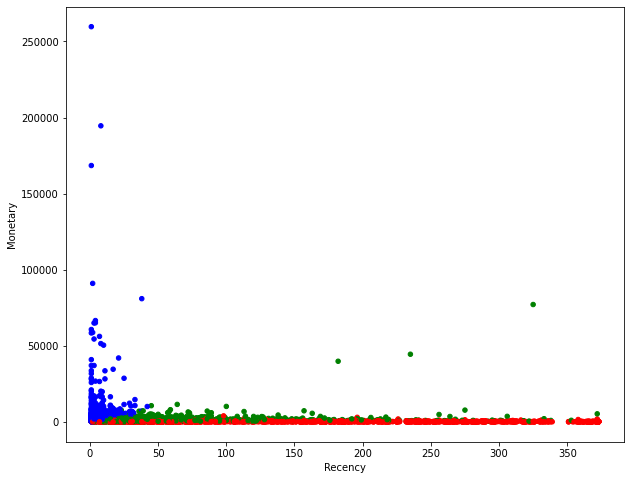

In [42]:
ax3 = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = RFMScores['Color']
)
plt.savefig('fig3')
plt.show()

In [43]:
RFMScores.head()

,Recency,Frequency,Monetary,Cluster,Color
CustomerID,,,,,
12346.0,325,1,77183.60,1,green
12747.0,2,103,4196.01,2,blue
12748.0,1,4596,33719.73,2,blue
12749.0,3,199,4090.88,2,blue
12820.0,3,59,942.34,2,blue


In [44]:
x=['Recency','Frequency','Monetary']
colors=['red','green','blue']

In [45]:
plt.figure(figsize=(7,3))
for i in range(k):
    plt.plot(x,best_centroids[i],marker='o', markerfacecolor=colors[i], markersize=12, color=colors[i], linewidth=4)

plt.ylabel('Value')
plt.title(f"Snake plot for k={k}")


Text(0.5, 1.0, 'Snake plot for k=3')

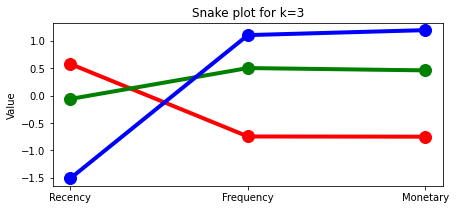

In [46]:
plt.savefig('Snake_plot_1')
plt.show()

In [47]:
print(best_centroids)

[[ 0.58108963 -0.74478674 -0.748195  ]
 [-0.05852723  0.50569701  0.46342471]
 [-1.51045236  1.1078674   1.19866533]]


In [48]:
#Just to get another snake plot
k=4

In [49]:
mini_error = math.inf
for xx in tqdm(range(reps)):
    #randomly choosing k centroids
    centroids = data[np.random.randint(0,len(data),k)]
    for yy in range(max_iter):
        #key are going to be centroid's index and value is going to be points belonging to that cluster
        classifications = {}
        #initialisating with empty array
        for i in range(k):
            classifications[i] = []

        for x in data:
            #array of the distances between point and centroid
            distances = [np.linalg.norm(x-centroids[centroid]) for centroid in range(len(centroids))]
            #classify to the cluster with whose centroid x has minimum distance        
            classifications[np.argmin(distances)].append(x)

        #recomputing centroid
        prev_centroids=centroids
        for classification in classifications:
            if len(classifications[classification])>0:
                centroids[classification] = np.average(classifications[classification],axis=0)
            else:
                centroids[classification] = data[np.random.randint(0,len(data),1)]
        if(max(np.linalg.norm(prev_centroids-centroids,axis=0))<1e-4):
            break
    #calculating sum of squared error
    error=0
    for i in range(k):
        for x in classifications[i]:
            error = error + np.square(x-centroids[i]).sum()

    if error<mini_error:
        mini_error = error
        best_centroids = centroids

100%|██████████| 100/100 [00:20<00:00,  4.96it/s]


In [50]:
colors=['red','green','blue','yellow']
x=['Recency','Frequency','Monetary']
plt.figure(figsize=(7,4))
for i in range(4):
    plt.plot(x,best_centroids[i],marker='o', markerfacecolor=colors[i], markersize=12, color=colors[i], linewidth=4)

plt.ylabel('Value')
plt.title(f"Snake plot for k={k}")

Text(0.5, 1.0, 'Snake plot for k=4')

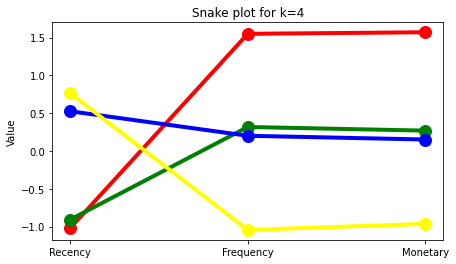

In [51]:
plt.savefig('Snake_plot_2')
plt.show()

In [52]:
print(best_centroids)

[[-1.02142914  1.5497981   1.57078891]
 [-0.90839604  0.31712568  0.26898045]
 [ 0.5250878   0.20075148  0.15138365]
 [ 0.76275325 -1.04497974 -0.96499842]]
